# Predicting Hotel Cancellations

In [1]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 23.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 M

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from autogluon.tabular import TabularDataset, TabularPredictor


pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  
plt.style.use('ggplot')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
hotels = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
display(hotels)
hotels.shape

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


(36275, 19)

In [4]:
np.round(hotels.isnull().sum()/len(hotels) *100,3).astype(str) + ['%']

Booking_ID                              0.0%
no_of_adults                            0.0%
no_of_children                          0.0%
no_of_weekend_nights                    0.0%
no_of_week_nights                       0.0%
type_of_meal_plan                       0.0%
required_car_parking_space              0.0%
room_type_reserved                      0.0%
lead_time                               0.0%
arrival_year                            0.0%
arrival_month                           0.0%
arrival_date                            0.0%
market_segment_type                     0.0%
repeated_guest                          0.0%
no_of_previous_cancellations            0.0%
no_of_previous_bookings_not_canceled    0.0%
avg_price_per_room                      0.0%
no_of_special_requests                  0.0%
booking_status                          0.0%
dtype: object

In [5]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## EDA

In [7]:
# plot features using countplot
def countplot_features(title, *args):
    nrows= int(np.ceil(len(*args)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,5), constrained_layout=True)
    ax = ax.ravel()
    for i, col in enumerate(*args):
        sns.countplot(data=hotels, x=col, ax=ax[i], hue='booking_status', palette= 'mako')
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90, fontsize='small')
        ax[i].set_xlabel(col.replace('_', ' ').capitalize(), fontsize=15)
    plt.suptitle(title, fontsize=15)

In [8]:
# making canceled and not canceled ratio and percentage from total data set
def ratio_percetage_cal(col=None):
    temp = hotels.groupby([col,'booking_status'])['booking_status'].count().unstack()
    temp = temp.replace(np.nan,0)
    temp['row_sum'] = temp.sum(axis=1)
    temp['Canceled_ratio'] = np.round(temp['Canceled']/ temp['row_sum'] *100, 2)
    temp['Not_Canceled_ratio'] = np.round(temp['Not_Canceled']/ temp['row_sum'] *100, 2)
    temp['Percentage of data'] = np.round(temp['row_sum']/ len(hotels) * 100,2)
    return temp

In [9]:
def show_ratio(*args):
    for i, col in enumerate(*args):
        print(col.replace('_',' ').upper())
        print(ratio_percetage_cal(col).iloc[:,-3:])
        print('___________________________________________________________________________')

### How many of custemrs were canceled? 
The number of customers who cancelled their bookings was approximately twice the number of those who cancelled, specifically 24,390 and 11,885 respectively.

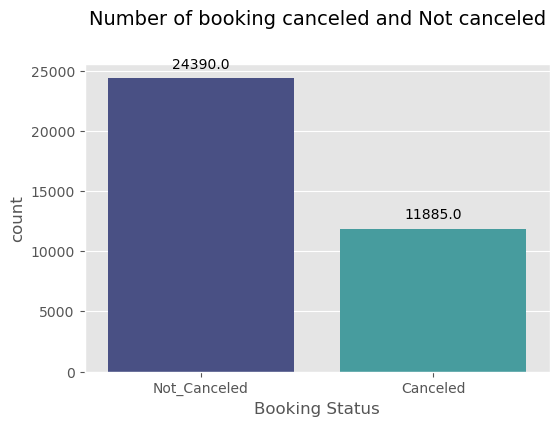

In [10]:
plt.figure(figsize=(6,4))
bplot = sns.countplot(data=hotels, x='booking_status', palette='mako')
for p in bplot.patches:
        bplot.annotate(p.get_height(),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points') 
plt.xlabel('Booking Status')
plt.title('Number of booking canceled and Not canceled', fontsize = 14, x=0.5, y=1.1)
plt.show()

In [11]:
cols = ['required_car_parking_space', 'arrival_year', 'repeated_guest']
check_values = {}
for i, col in enumerate(cols):
    check_values[col] = None
    check_values[col] =[hotels[col].astype('str').unique(),[hotels[col].astype('str').nunique()]]
    
display(pd.DataFrame(check_values))
hotels[cols] = hotels[cols].astype('str')

,required_car_parking_space,arrival_year,repeated_guest
0,"[0, 1]","[2017, 2018]","[0, 1]"
1,[2],[2],[2]


### Does a certain number of customers cancel more than others?
The majority of hotel guests consist of two adults with no children. Following that, the hotel has single adult guests. From the data table, it is difficult to establish a clear correlation between cancellations and customer types, as there are no discernible fluctuations in the number of adults or children in relation to the cancellation ratio.

NO OF ADULTS
booking_status  Canceled_ratio  Not_Canceled_ratio  Percentage of data
no_of_adults                                                          
0                        31.65               68.35                0.38
1                        24.12               75.88               21.21
2                        34.93               65.07               71.97
3                        37.25               62.75                6.39
4                        18.75               81.25                0.04
___________________________________________________________________________
NO OF CHILDREN
booking_status  Canceled_ratio  Not_Canceled_ratio  Percentage of data
no_of_children                                                        
0                        32.41               67.59               92.56
1                        33.37               66.63                4.46
2                        43.19               56.81                2.92
3                        26.32              

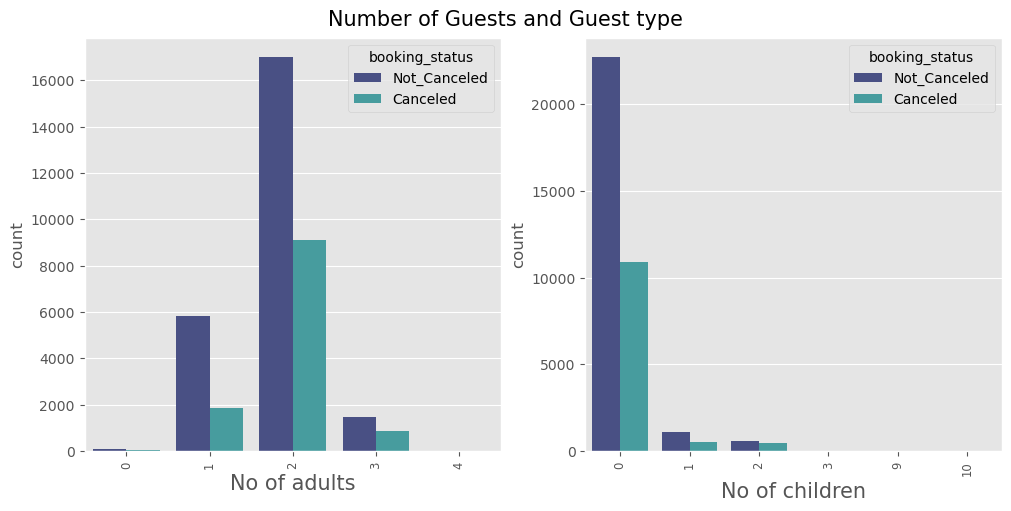

In [12]:
num_guests = ['no_of_adults', 'no_of_children']
show_ratio(num_guests)
countplot_features('Number of Guests and Guest type',num_guests)

### When do customers cancel during the week or the weekend?
It appears that the longer a customer's stay, the higher the likelihood of them cancelling their hotel reservation. Additionally, customers are more inclined to cancel their bookings over the weekend compared to weeknights.

NO OF WEEKEND NIGHTS
booking_status        Canceled_ratio  Not_Canceled_ratio  Percentage of data
no_of_weekend_nights                                                        
0                              30.19               69.81               46.51
1                              34.34               65.66               27.55
2                              34.80               65.20               25.01
3                              48.37               51.63                0.42
4                              64.34               35.66                0.36
5                              85.29               14.71                0.09
6                              80.00               20.00                0.06
7                             100.00                0.00                0.00
___________________________________________________________________________
NO OF WEEK NIGHTS
booking_status     Canceled_ratio  Not_Canceled_ratio  Percentage of data
no_of_week_nights                        

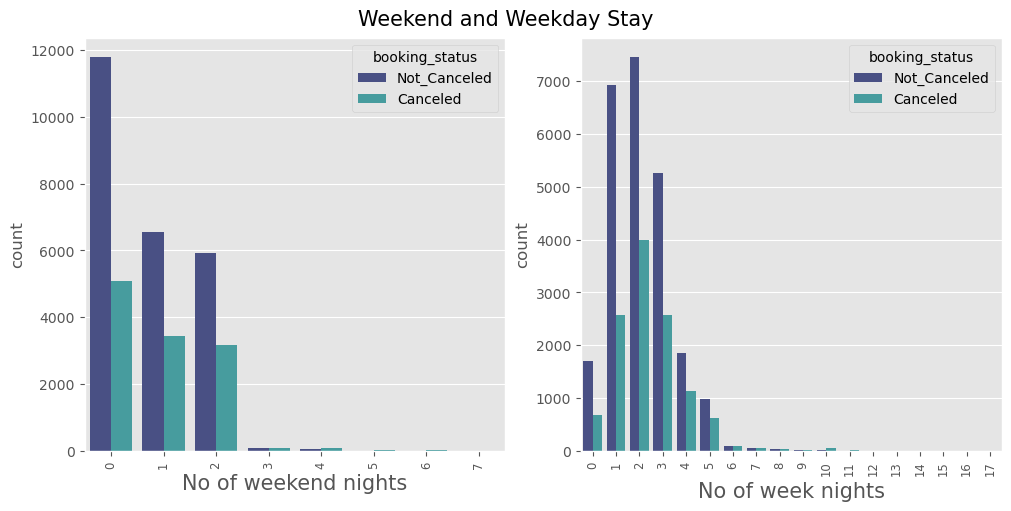

In [13]:
stay_types = ['no_of_weekend_nights','no_of_week_nights']
show_ratio(stay_types)
countplot_features('Weekend and Weekday Stay',stay_types)


### Is there seasonal or monthly effect on cancelation ?
The cancellation rate doubled in 2018, reaching approximately 37%, up from 15% in 2017. Furthermore, there seems to be a monthly influence on cancellation rates, with the lowest rate occurring in January at just 2%, while the rate skyrocketed to 45% in July, nearly twentyfold higher than the January rate.

ARRIVAL YEAR
booking_status  Canceled_ratio  Not_Canceled_ratio  Percentage of data
arrival_year                                                          
2017                     14.75               85.25               17.96
2018                     36.71               63.29               82.04
___________________________________________________________________________
ARRIVAL MONTH
booking_status  Canceled_ratio  Not_Canceled_ratio  Percentage of data
arrival_month                                                         
1                         2.37               97.63                2.80
2                        25.23               74.77                4.70
3                        29.69               70.31                6.50
4                        36.37               63.63                7.54
5                        36.49               63.51                7.16
6                        40.31               59.69                8.83
7                        45.00               

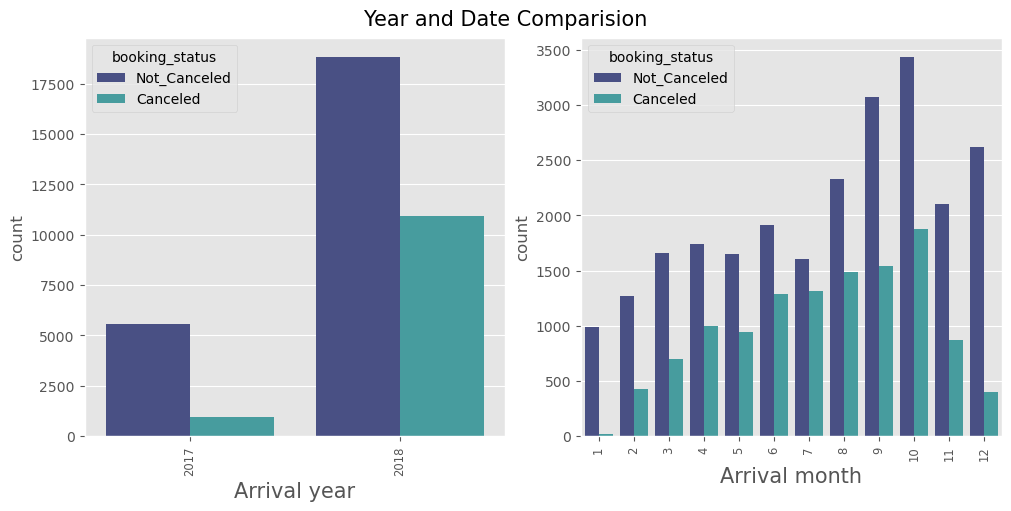

In [14]:
date_features = ['arrival_year', 'arrival_month']
show_ratio(date_features)
countplot_features('Year and Date Comparision',date_features)

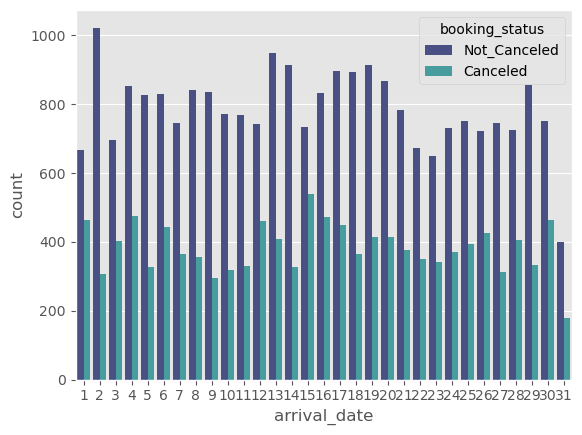

In [15]:
sns.countplot(data=hotels, x='arrival_date', palette='mako', hue='booking_status')
plt.show()

### Is any relation between the customer's request and the cancellation?
A majority of customers opt for meal plan 1, do not request parking space, choose room type 1, and do not make any special requests. It appears that the more requests a customer makes, the less likely they are to cancel. While there seems to be a relationship between the room type a customer selects and the cancellation rate, it's worth noting that this effect may be accentuated by the high percentage due to the small sample size.

TYPE OF MEAL PLAN
booking_status     Canceled_ratio  Not_Canceled_ratio  Percentage of data
type_of_meal_plan                                                        
Meal Plan 1                 31.18               68.82               76.73
Meal Plan 2                 45.57               54.43                9.11
Meal Plan 3                 20.00               80.00                0.01
Not Selected                33.12               66.88               14.14
___________________________________________________________________________
REQUIRED CAR PARKING SPACE
booking_status              Canceled_ratio  Not_Canceled_ratio  \
required_car_parking_space                                       
0                                    33.49               66.51   
1                                    10.14               89.86   

booking_status              Percentage of data  
required_car_parking_space                      
0                                         96.9  
1                      

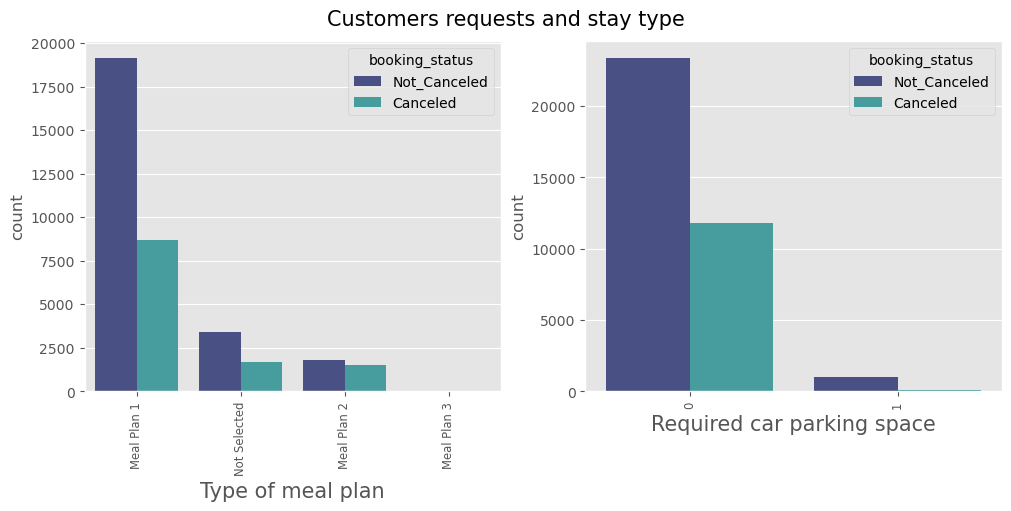

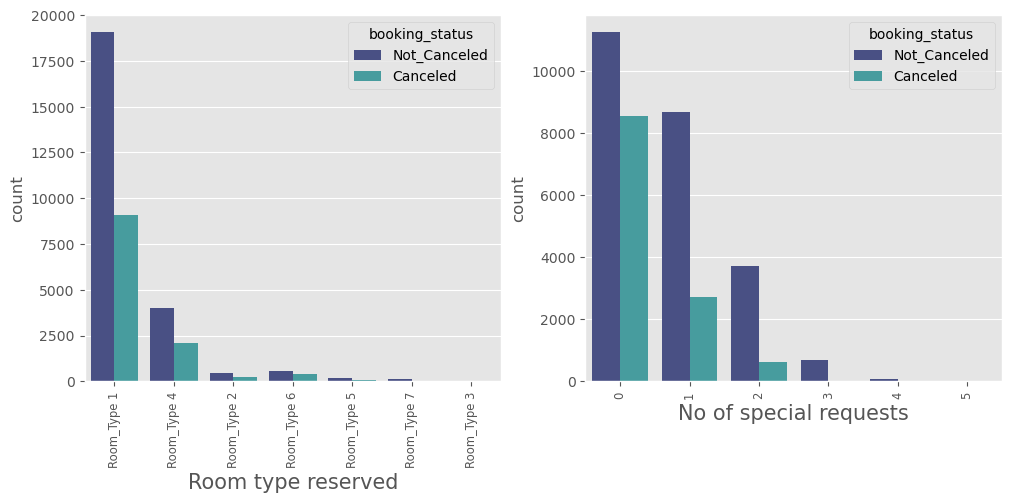

In [16]:
requests = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'no_of_special_requests']
show_ratio(requests)
countplot_features('Customers requests and stay type',requests[:2])
countplot_features('',requests[2:])

### Does frequency of previous cancelation have any relation with cancelation of current booking?
Among the customers who cancelled their current bookings, a significant 99% had no history of prior cancellations. Similarly, among those who did not cancel their current bookings, 97% had never cancelled before. Given the cancelation history distribution depicted below, it is challenging to establish a connection between the frequency of past cancellations and present cancellations.

NO OF PREVIOUS CANCELLATIONS
booking_status                Canceled_ratio  Not_Canceled_ratio  \
no_of_previous_cancellations                                       
0                                      33.03               66.97   
1                                       5.56               94.44   
2                                       0.00              100.00   
3                                       2.33               97.67   
4                                       0.00              100.00   
5                                       0.00              100.00   
6                                       0.00              100.00   
11                                      0.00              100.00   
13                                    100.00                0.00   

booking_status                Percentage of data  
no_of_previous_cancellations                      
0                                          99.07  
1                                           0.55  
2                 

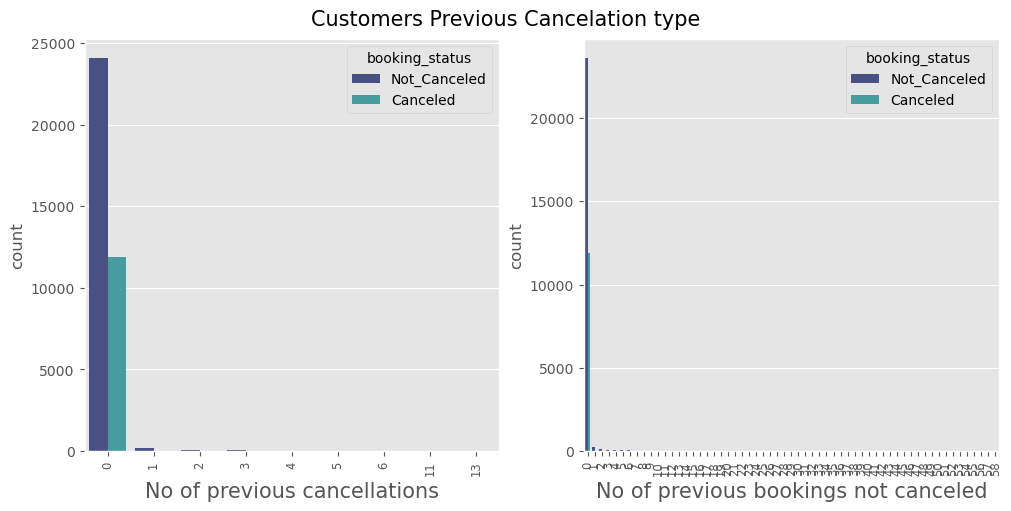

In [17]:
previous =[ 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']
show_ratio(previous)
countplot_features('Customers Previous Cancelation type', previous)

### Customers's booking type
The majority of customers are new guests who booked online. The data table indicates that customers on business trips exhibit a relatively lower rate of cancellations compared to other customer types. Additionally, repeat guests also rarely cancel their reservations.

REPEATED GUEST
booking_status  Canceled_ratio  Not_Canceled_ratio  Percentage of data
repeated_guest                                                        
0                        33.58               66.42               97.44
1                         1.72               98.28                2.56
___________________________________________________________________________
MARKET SEGMENT TYPE
booking_status       Canceled_ratio  Not_Canceled_ratio  Percentage of data
market_segment_type                                                        
Aviation                      29.60               70.40                0.34
Complementary                  0.00              100.00                1.08
Corporate                     10.91               89.09                5.56
Offline                       29.95               70.05               29.02
Online                        36.51               63.49               63.99
_________________________________________________________________________

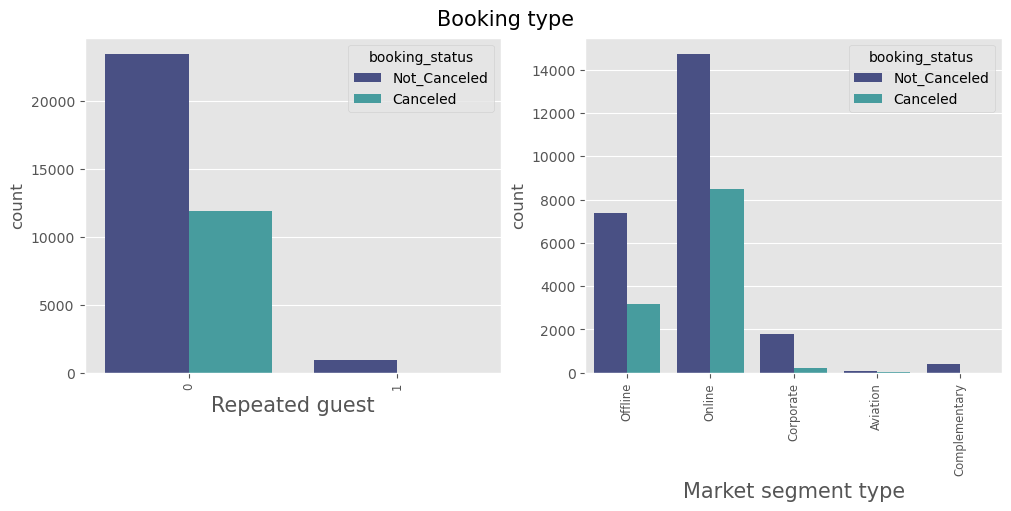

In [18]:
booking_type =['repeated_guest', 'market_segment_type']
show_ratio(booking_type)
countplot_features('Booking type', booking_type)

### Cancelations with Lead time and Avearage price per room
Lower lead time and price levels are associated with lower cancellation rates when compared to longer lead times and higher prices for the room. This trend highlights that the cancellation ratio tends to increase as lead time and price increase. Consequently, we can conclude that the lowest lead time and room price have an impact on booking cancellations.

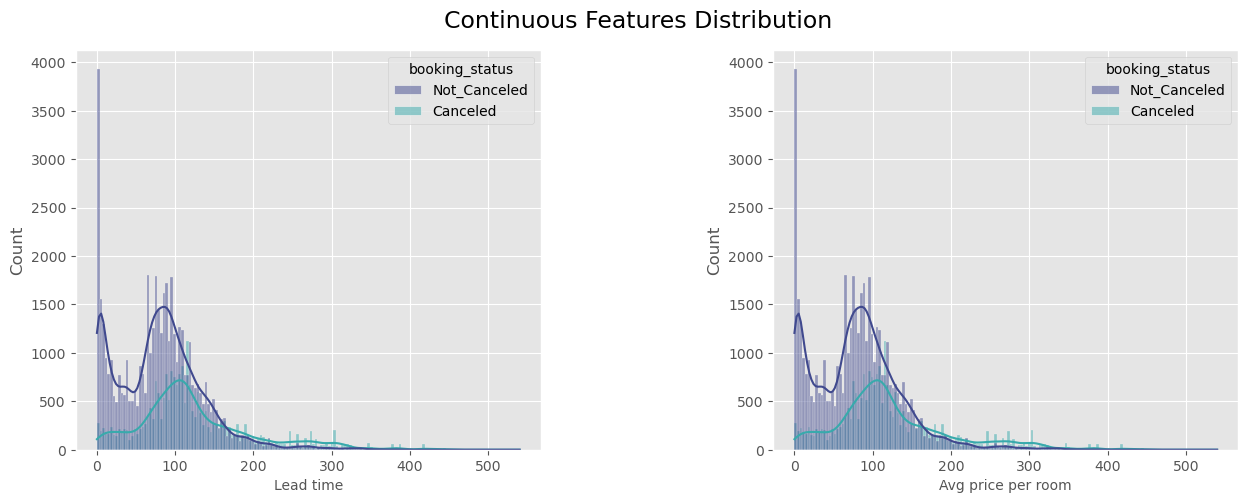

In [19]:
continuous_features = ['lead_time', 'avg_price_per_room']
hotels_long = pd.melt(hotels, id_vars=['booking_status'], value_vars=continuous_features, var_name='feature')
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.5, hspace=0.75)
for i, col in enumerate(continuous_features):
    row = 1
    col_idx = i % 2
    sns.histplot(data=hotels_long, x='value', kde=True, ax=axes[col_idx], palette='mako', hue='booking_status')
    axes[col_idx].set_xlabel(col.replace('_', ' ').capitalize(), fontsize =10)
plt.suptitle('Continuous Features Distribution', fontsize=17)
plt.show()

In [20]:
cat_cols = [i for i in hotels.columns if hotels[i].dtype =='object']
num_cols = [i for i in hotels.columns if hotels[i].dtype !='object']
cat_cols.remove('Booking_ID')

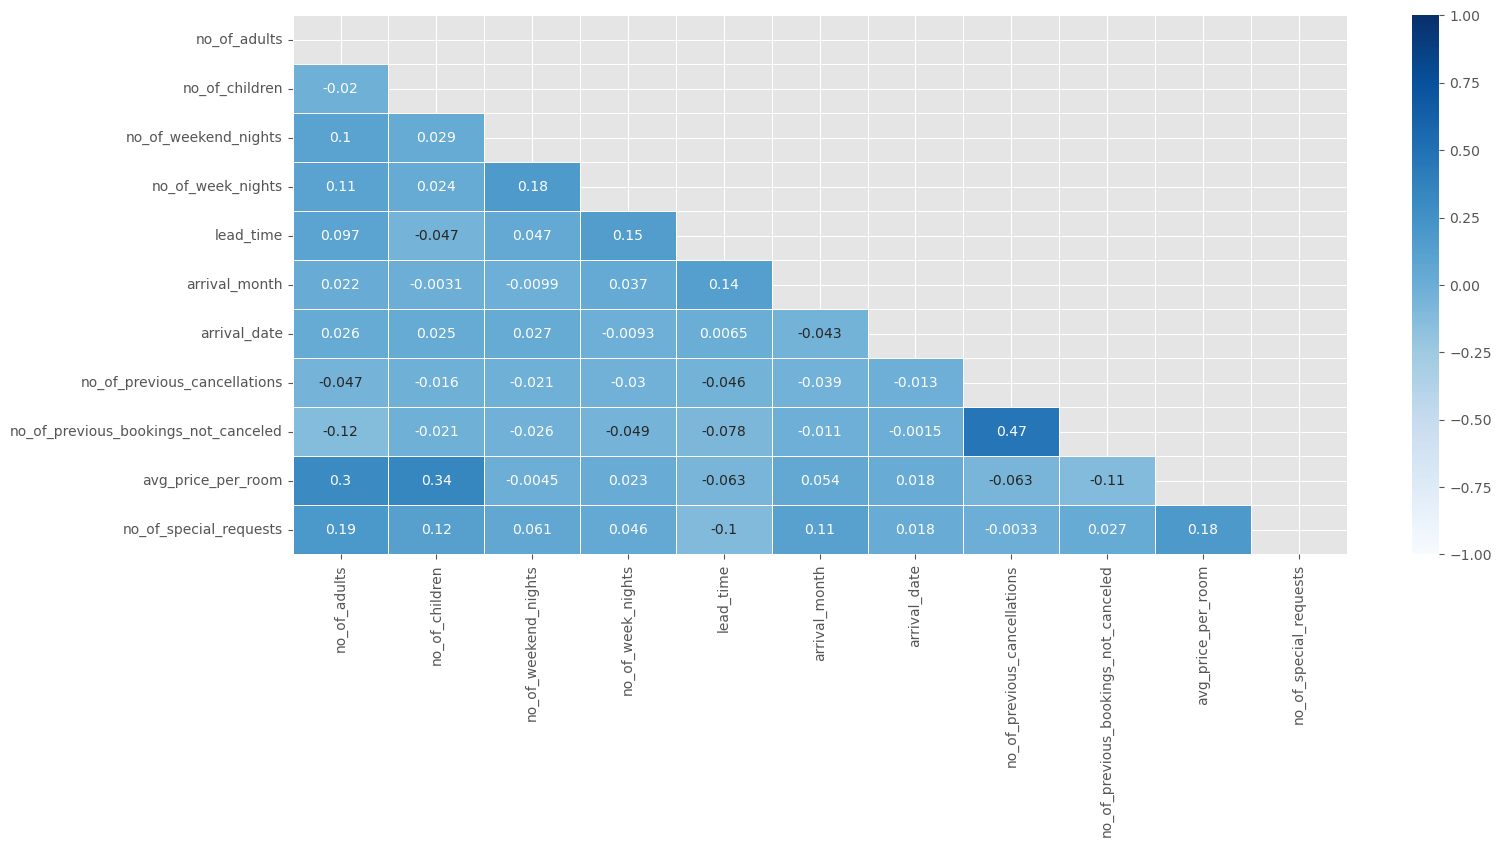

In [21]:
plt.figure(figsize=(17,7))
corr_mat = hotels[num_cols].corr()
sns.heatmap(corr_mat,annot=True, vmin = -1, vmax = +1, cmap = 'Blues', linewidths=.5,mask=np.triu(corr_mat))
plt.show()

## Search Method

In [22]:
num_imputer =  SimpleImputer(strategy="median")
scaler = StandardScaler()

num_features =num_imputer.fit_transform(hotels[num_cols])
num_features = scaler.fit_transform(num_features)

cat_imputer = SimpleImputer(strategy="most_frequent")
encoder = OneHotEncoder() 

cat_features = cat_imputer.fit_transform(hotels[cat_cols])
cat_features = encoder.fit_transform(cat_features)

num_features_df = pd.DataFrame(num_features, columns = hotels[num_cols].columns)
cat_features_df = pd.DataFrame(cat_features.toarray(), columns = encoder.get_feature_names_out(cat_cols))
processed_df = pd.concat([num_features_df, cat_features_df], axis=1)
processed_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space_0,required_car_parking_space_1,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2017,arrival_year_2018,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_0,repeated_guest_1,booking_status_Canceled,booking_status_Not_Canceled
0,0.298893,-0.26147,0.217401,-0.144803,1.614896,0.839242,-1.555662,-0.063393,-0.087456,-1.095033,-0.788140,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.298893,-0.26147,1.365993,0.563972,-0.933701,1.164990,-1.098013,-0.063393,-0.087456,0.092806,0.483760,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,-1.628975,-0.26147,1.365993,-0.853578,-0.980250,-1.766747,1.419055,-0.063393,-0.087456,-1.237528,-0.788140,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.298893,-0.26147,-0.931190,-0.144803,1.463610,-0.789501,0.503757,-0.063393,-0.087456,-0.097567,-0.788140,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.298893,-0.26147,0.217401,-0.853578,-0.433291,-1.115250,-0.525952,-0.063393,-0.087456,-0.254312,-0.788140,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,-0.002706,0.187744,-1.441250,-0.063393,-0.087456,1.834665,0.483760,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
36271,0.298893,-0.26147,0.217401,0.563972,1.661446,0.839242,0.160521,-0.063393,-0.087456,-0.355483,1.755661,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
36272,0.298893,-0.26147,1.365993,2.690296,0.730452,-0.138004,-1.670074,-0.063393,-0.087456,-0.143451,1.755661,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
36273,0.298893,-0.26147,-0.931190,0.563972,-0.258730,-1.115250,0.618170,-0.063393,-0.087456,-0.254312,-0.788140,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [23]:
processed_df.drop('booking_status_Canceled',axis=1, inplace=True)

In [24]:
processed_df = TabularDataset(processed_df)

In [25]:
predictor = TabularPredictor(label='booking_status_Not_Canceled').fit(processed_df)

No path specified. Models will be saved in: "AutogluonModels/ag-20230817_042756/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230817_042756/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Aug 12 11:01:48 UTC 2023
Disk Space Avail:   20.94 GB / 20.96 GB (99.9%)
Train Data Rows:    36275
Train Data Columns: 33
Label Column: booking_status_Not_Canceled
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1.0, 0.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator..

### Select Model
Weighted Ensemble L2 model is the best model in this data set. 

In [26]:
predictor.leaderboard(processed_df, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.988174,0.915234,3.193679,0.509783,19.349773,0.006352,0.004728,1.394752,2,True,14
1,RandomForestGini,0.988091,0.909636,0.864983,0.190085,5.455809,0.864983,0.190085,5.455809,1,True,5
2,RandomForestEntr,0.988063,0.909236,0.845219,0.198497,5.489614,0.845219,0.198497,5.489614,1,True,6
3,ExtraTreesEntr,0.987705,0.904038,1.049604,0.172606,4.071491,1.049604,0.172606,4.071491,1,True,9
4,ExtraTreesGini,0.987540,0.901639,0.998029,0.190634,3.844004,0.998029,0.190634,3.844004,1,True,8
5,KNeighborsDist,0.979600,0.862055,1.728171,0.128430,0.032900,1.728171,0.128430,0.032900,1,True,2
6,LightGBMLarge,0.947760,0.903639,0.957904,0.070438,4.036727,0.957904,0.070438,4.036727,1,True,13
7,XGBoost,0.933811,0.902039,0.681217,0.055286,3.829386,0.681217,0.055286,3.829386,1,True,11
8,LightGBM,0.929235,0.899640,0.795909,0.061186,3.180212,0.795909,0.061186,3.180212,1,True,4
9,CatBoost,0.918732,0.894042,0.043378,0.010999,19.564931,0.043378,0.010999,19.564931,1,True,7


### Important features on expecting booking status
The most influential factors for predicting booking statuses are lead time and the number of requests. Following closely, the month of booking and the room price are also useful indicators for predicting booking outcomes. However, other features appear to have a relatively lesser impact on predicting customer cancellations.

In [27]:
feature_im = predictor.feature_importance(processed_df)
feature_im

These features in provided data are not utilized by the predictor and will be ignored: ['room_type_reserved_Room_Type 3']
Computing feature importance via permutation shuffling for 32 features using 5000 rows with 5 shuffle sets...
	139.03s	= Expected runtime (27.81s per shuffle set)
	69.86s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
lead_time,0.23728,0.005714,4.032929e-08,5,0.249046,0.225514
no_of_special_requests,0.17600,0.009918,1.204845e-06,5,0.196421,0.155579
avg_price_per_room,0.13732,0.005756,3.695938e-07,5,0.149172,0.125468
arrival_month,0.07880,0.003493,4.620183e-07,5,0.085992,0.071608
market_segment_type_Online,0.05728,0.002880,7.638811e-07,5,0.063209,0.051351
arrival_date,0.05580,0.002280,3.339525e-07,5,0.060495,0.051105
no_of_weekend_nights,0.04340,0.003082,3.032177e-06,5,0.049746,0.037054
no_of_week_nights,0.04248,0.002671,1.864579e-06,5,0.047979,0.036981
no_of_adults,0.02568,0.001758,2.621622e-06,5,0.029301,0.022059
market_segment_type_Offline,0.02428,0.002119,6.897100e-06,5,0.028644,0.019916


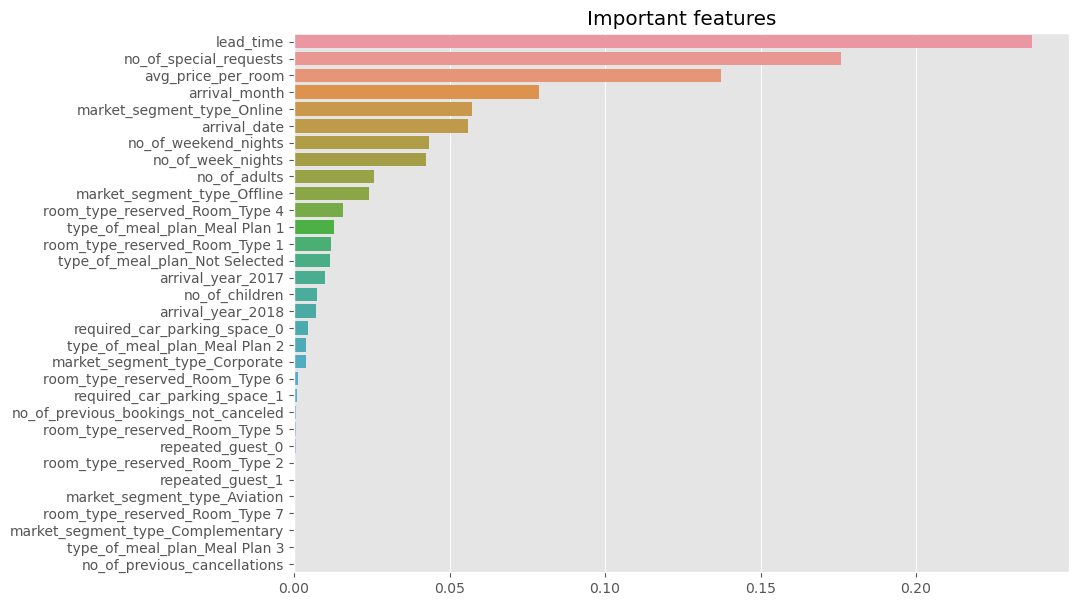

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(data = feature_im, x='importance', y =feature_im.index)
plt.title('Important features')
plt.xlabel('')
plt.show()